<a href="https://colab.research.google.com/github/inf032/introducaoML/blob/master/Farmaco_Arvore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split 

from sklearn.tree import plot_tree
from sklearn.tree import export_text

In [2]:
from sklearn.tree import DecisionTreeClassifier


Leitura dos Dados


In [3]:
SEED = 1234
np.random.seed(SEED)
warnings.filterwarnings(action='once')

df = pd.read_csv('https://raw.githubusercontent.com/inf032/introducaoML/master/data/farmaco.csv')
df.columns = ['IDADE', 'SEXO', 'PA', 'COLESTEROL', 'NA_K', 'FARMACO']
preditoras = ['IDADE', 'SEXO', 'PA', 'COLESTEROL', 'NA_K']
alvo = 'FARMACO'

X = df[preditoras]
y = df[alvo]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=SEED)

print(f'Holdout: {X_train.shape[0]} individuos em treino. {X_test.shape[0]} individuos em teste.')

Holdout: 157 individuos em treino. 68 individuos em teste.


In [4]:


ordinal_transformer = Pipeline(steps=[('ordinal_encoder', OrdinalEncoder(categories=[['LOW', 'NORMAL', 'HIGH'], 
                                                                                     ['LOW', 'NORMAL', 'HIGH']], 
                                                                          handle_unknown='use_encoded_value',
                                                                          unknown_value=np.nan))
                                     ])
onehot_transformer = Pipeline(steps=[('one_hot_encoder',  OneHotEncoder(drop='if_binary', sparse=False))])


col_transformer = ColumnTransformer(transformers=[('pa_colesterol', ordinal_transformer, ['PA', 'COLESTEROL']),
                                                  ('sex', onehot_transformer, ['SEXO'])],
                                    remainder='passthrough')

model_tree = Pipeline(steps=[('step_one', col_transformer),  
                             ('imputer', SimpleImputer()), 
                             ('classificador', DecisionTreeClassifier(max_depth=2,random_state=SEED))])


model_tree.fit(X_train, y_train)
print(model_tree.score(X_train, y_train))
print(model_tree.score(X_test, y_test))

0.9044585987261147
0.9411764705882353


[Text(0.5, 0.8333333333333334, 'NA_K <= 14.829\ngini = 0.494\nsamples = 157\nvalue = [87, 70]'),
 Text(0.25, 0.5, 'IDADE <= 1.039\ngini = 0.28\nsamples = 83\nvalue = [14, 69]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.038\nsamples = 52\nvalue = [1, 51]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.487\nsamples = 31\nvalue = [13, 18]'),
 Text(0.75, 0.5, 'NA_K <= 16.592\ngini = 0.027\nsamples = 74\nvalue = [73, 1]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.142\nsamples = 13\nvalue = [12, 1]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.0\nsamples = 61\nvalue = [61, 0]')]

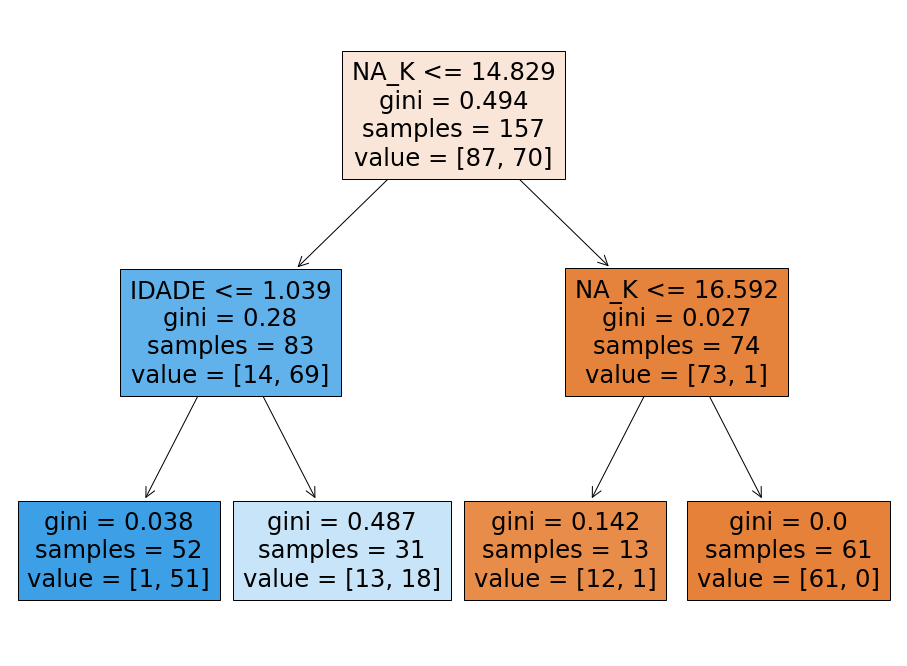

In [5]:
plt.figure(figsize=(16, 12))
fig = plot_tree(model_tree['classificador'], feature_names=X_train.columns, filled=True) 
fig

In [10]:
for nivel in range(1, 8):
  model_tree = Pipeline(steps=[('step_one', col_transformer),  
                               ('imputer', SimpleImputer()), 
                               ('classificador', DecisionTreeClassifier(max_depth=nivel,random_state=SEED))])

  model_tree.fit(X_train, y_train)
  print(f'{np.round(model_tree.score(X_train, y_train) * 100, 2)} %, - {np.round(model_tree.score(X_test, y_test) * 100, 2)}%')  


90.45 %, - 94.12%
90.45 %, - 94.12%
98.73 %, - 100.0%
100.0 %, - 98.53%
100.0 %, - 98.53%
100.0 %, - 98.53%
100.0 %, - 98.53%
